In [1]:
!pip install ethicml==0.2.2 -q

     |████████████████████████████████| 37.5 MB 2.0 MB/s 
     |████████████████████████████████| 3.9 MB 33.4 MB/s 
     |████████████████████████████████| 181 kB 38.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 8.8 MB 41.9 MB/s 
     |████████████████████████████████| 2.1 MB 44.1 MB/s 
     |████████████████████████████████| 461 kB 53.1 MB/s 


# NEW CODE

# TASK 1 (STANDARD MODEL - ADULT DATASET)
###Using LOGSTIC REGRESSION

In [2]:
# Task 1 reworking with ethhicml
import ethicml as em
import json
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

# to visualise al the columns in the dataframe
em.pd.pandas.set_option('display.max_columns', None)

In [3]:
data = em.adult(split="Sex", binarize_nationality=True).load()
train, test = em.train_test_split(data)
C_arr = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
hyperparams = {"C": C_arr}

In [4]:
data.x.head()

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,...,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,age,capital-gain,capital-loss,education-num,hours-per-week
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,37,0,0,10,40
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,33,0,0,9,40
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,38,0,0,7,40
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,23,0,0,10,9
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,21,0,0,4,38


In [5]:
data.x.shape

(45222, 62)

In [ ]:
data.x.columns

Index(['education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'native-country_United-States', 'native-country_not_United-States',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-se

In [ ]:
data.s

,sex_Male
0,1
1,1
2,1
3,1
4,0
...,...
45217,0
45218,1
45219,1
45220,1


In [ ]:
data.s.value_counts()

sex_Male
1           30527
0           14695
dtype: int64

In [ ]:
# Plot result
def acc_fair_extraction(payload):
  accs = []
  fairness = []
  for i,j in payload.items():
    accs.append(j[2]["Accuracy"])
    fairness.append(j[2]["CV absolute"])
  return(accs, fairness)


def plot_acc_fairness(acc_s, fair_s, C_arr):
  y = np.array(acc_s)
  plt.plot(y, label="Accuracy")

  y2 = np.array(fair_s)
  plt.plot(y2, label="Fairness Metric")
  x_arr = [str(i) for i in C_arr]
  x = np.array(C_arr)
  plt.xlabel("C")
  plt.ylabel("Performance")
  plt.xticks([0,1,2,3,4,5,6], x_arr)
  plt.legend()
  plt.show()

fold: 0, model: 'Logistic Regression (C=100)', Accuracy=0.8391, CV absolute=0.8099, completed!
fold: 0, model: 'Logistic Regression (C=10)', Accuracy=0.8391, CV absolute=0.8099, completed!
fold: 0, model: 'Logistic Regression (C=1)', Accuracy=0.8393, CV absolute=0.8101, completed!
fold: 0, model: 'Logistic Regression (C=0.1)', Accuracy=0.8402, CV absolute=0.8082, completed!
fold: 0, model: 'Logistic Regression (C=0.01)', Accuracy=0.8394, CV absolute=0.8126, completed!
fold: 0, model: 'Logistic Regression (C=0.001)', Accuracy=0.8103, CV absolute=0.8773, completed!
fold: 0, model: 'Logistic Regression (C=0.0001)', Accuracy=0.7978, CV absolute=0.9334, completed!
fold: 1, model: 'Logistic Regression (C=100)', Accuracy=0.8449, CV absolute=0.8256, completed!
fold: 1, model: 'Logistic Regression (C=10)', Accuracy=0.8454, CV absolute=0.8264, completed!
fold: 1, model: 'Logistic Regression (C=1)', Accuracy=0.8455, CV absolute=0.8251, completed!
fold: 1, model: 'Logistic Regression (C=0.1)', Acc

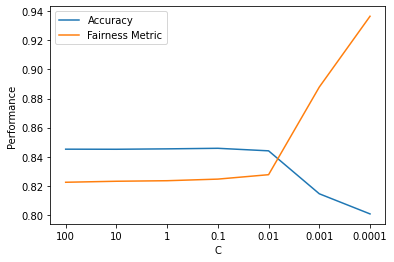

In [ ]:
cv = em.CrossValidator(em.LR, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results.mean_storage)
print(cv_results.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [ ]:
print(json.dumps(cv_results.mean_storage, indent=2))

{
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8451504055396823,
      "CV absolute": 0.8223945093358291
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8450951072786265,
      "CV absolute": 0.8230876233935067
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8453715336394889,
      "CV absolute": 0.8234592725743172
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.8457585030388257,
      "CV absolute": 0.8245599186384858
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.844017014673236,
      "CV absolute": 0.8276008830337559
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.8144678358953906,
      "CV absolute": 0.8879015404957769
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.8006192182755117,
      "CV absolute": 0.9366000785200

In [ ]:
# Test the higest ACCURACY Model on the Test Set
# Highest Accuracy Model C = 0.1 Training Accuracy = 0.8457585030388257 Fairness Metric = 0.8245599186384858
# The equivalent of the above, but in just EthicML
learner = em.LR(C=0.1)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.8529574350469873
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.07938144329896901}}


In [ ]:
# Test the higest FAIRNESS on the Test Set
# Highest FAIRNESS Model C = 0.0001 Training Accuracy = 0.8006192182755117, Fairness Metric = 0.936600078520044
# The equivalent of the above, but in just EthicML
learner = em.LR(C=0.0001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.8029850746268656
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.021874999999999978}}


# TASK 2 (FAIRNESS MODEL)
###Using Reweighing

fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8379, CV absolute=0.8937, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.839, CV absolute=0.8941, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8393, CV absolute=0.8934, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8391, CV absolute=0.8862, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8371, CV absolute=0.8913, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.8075, CV absolute=0.9378, completed!
fold: 0, model: 'Kamiran & Calders LR', Accuracy=0.7953, CV absolute=0.9441, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8405, CV absolute=0.9067, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8398, CV absolute=0.9069, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8398, CV absolute=0.9052, completed!
fold: 1, model: 'Kamiran & Calders LR', Accuracy=0.8396, CV absolute=0.9067, completed!
fold: 1, model: 'Kamiran & Calder

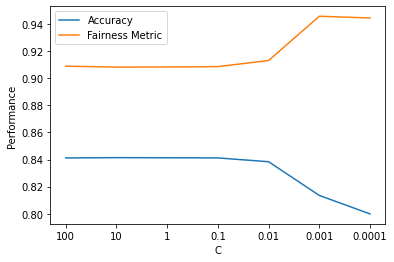

In [ ]:
# Task 2 reweighing
cv = em.CrossValidator(em.Kamiran, hyperparams, folds=5)
primary = em.Accuracy()
fair_measure = em.AbsCV()
cv_results = cv.run(train, measures=[primary, fair_measure])
best_result = cv_results.get_best_in_top_k(primary, fair_measure, top_k=5)

print(f"Best C: {best_result.params['C']}")
print(f"Best Accuracy: {best_result.scores['Accuracy']}")
print(f"Best CV Score: {best_result.scores['CV absolute']}")
print(cv_results.mean_storage)
print(cv_results.raw_storage)

acc_s, fair_s = acc_fair_extraction(cv_results.mean_storage)
plot_acc_fairness(acc_s, fair_s, C_arr)

In [ ]:
print(json.dumps(cv_results.mean_storage, indent=2))
result_j=json.dumps(cv_results.mean_storage, indent=2)

{
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8411975559505704,
      "CV absolute": 0.9089473707469011
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8414186916908967,
      "CV absolute": 0.9082859874712792
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8413357538499623,
      "CV absolute": 0.9083467975225632
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.841225191710189,
      "CV absolute": 0.9086360163576629
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.8384056718633661,
      "CV absolute": 0.9131267531803166
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.8135280481566673,
      "CV absolute": 0.9458266168812466
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.7998729114161971,
      "CV absolute": 0.9445457295541

In [ ]:
# Test the higest ACCURACY Model on the Test Set 
# Highest Accuracy Model C = 10 Training Accuracy = 0.8457585030388257 Fainess Metric = 0.9082859874712792
# The equivalent of the above, but in just EthicML
learner = em.Kamiran(C=10)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.844555002763958
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.12145618556701032}}


In [ ]:
# Test the higest FAIRNESS on the Test Set
# Highest FAIRNESS Model C = 0.001 Training Accuracy = 0.8135280481566673 Fainess Metric = 0.9458266168812466
# The equivalent of the above, but in just EthicML
learner = em.Kamiran(C=0.001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)

Accuracy 0.817910447761194
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.14375000000000004}}


# Task 3 (Extra): Model Selection Strategy
### Using my custom Accuracy-Fairness Metric Score

### Formular:


*   (Accuracy * Abs(Fairness)) * 100
or
*   (Accuracy * Abs(1-Equal opportunity difference)) * 100



In [ ]:
# Standard Model

In [ ]:
# loading the 5 fold cross validation results of the STANDARD Model

standard_model_result = {
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8451504055396823,
      "CV absolute": 0.8223945093358291
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8450951072786265,
      "CV absolute": 0.8230876233935067
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8453715336394889,
      "CV absolute": 0.8234592725743172
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.8457585030388257,
      "CV absolute": 0.8245599186384858
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.844017014673236,
      "CV absolute": 0.8276008830337559
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.8144678358953906,
      "CV absolute": 0.8879015404957769
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.8006192182755117,
      "CV absolute": 0.936600078520044
    }
  ]
}

In [ ]:
# loading the 5 fold cross validation results of the FAIRNESS-BASED Model
fairness_model_results = {
  "C=100": [
    {
      "C": 100
    },
    -1,
    {
      "Accuracy": 0.8411975559505704,
      "CV absolute": 0.9089473707469011
    }
  ],
  "C=10": [
    {
      "C": 10
    },
    -1,
    {
      "Accuracy": 0.8414186916908967,
      "CV absolute": 0.9082859874712792
    }
  ],
  "C=1": [
    {
      "C": 1
    },
    -1,
    {
      "Accuracy": 0.8413357538499623,
      "CV absolute": 0.9083467975225632
    }
  ],
  "C=0.1": [
    {
      "C": 0.1
    },
    -1,
    {
      "Accuracy": 0.841225191710189,
      "CV absolute": 0.9086360163576629
    }
  ],
  "C=0.01": [
    {
      "C": 0.01
    },
    -1,
    {
      "Accuracy": 0.8384056718633661,
      "CV absolute": 0.9131267531803166
    }
  ],
  "C=0.001": [
    {
      "C": 0.001
    },
    -1,
    {
      "Accuracy": 0.8135280481566673,
      "CV absolute": 0.9458266168812466
    }
  ],
  "C=0.0001": [
    {
      "C": 0.0001
    },
    -1,
    {
      "Accuracy": 0.7998729114161971,
      "CV absolute": 0.9445457295541038
    }
  ]
}

In [ ]:
print("ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL")
for c in C_arr:
 print(
     standard_model_result["C="+str(c)][0],
     (standard_model_result["C="+str(c)][2]['Accuracy'] * standard_model_result["C="+str(c)][2]['CV absolute'] * 100),
     )

ACCURACY-FAIRNESS CRITERIA SCORE FOR STANDARD MODEL
{'C': 100} 69.50470530787841
{'C': 10} 69.55873233914453
{'C': 1} 69.61290281458085
{'C': 0.1} 69.73785624535016
{'C': 0.01} 69.85092266390846
{'C': 0.001} 72.31672461757789
{'C': 0.0001} 74.98600227015005


In [ ]:
print("ACCURACY-FAIRNESS CRITERIA SCORE FOR FAIRNESS-BASED MODEL")
for c in C_arr:
 print(
     fairness_model_results["C="+str(c)][0],
     fairness_model_results["C="+str(c)][2]['Accuracy'] * standard_model_result["C="+str(c)][2]['CV absolute'] * 100,
     )

ACCURACY-FAIRNESS CRITERIA SCORE FOR FAIRNESS-BASED MODEL
{'C': 100} 69.17962512804681
{'C': 10} 69.25613112227339
{'C': 1} 69.28057278560547
{'C': 0.1} 69.3640575633198
{'C': 0.01} 69.38652743746312
{'C': 0.001} 72.23328071948275
{'C': 0.0001} 74.91610316384664


In [ ]:
# FOR THE STANDARD MODEL 
print("TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC")
# Test the higest FAIRNESS on the Test Set
# Highest ACCURACY-FAIRNESS Model C = 0.0001 Score of 74.98600227015005
# The equivalent of the above, but in just EthicML
learner = em.LR(C=0.0001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {em.Accuracy().score(predictions, test)*(1-em.diff_per_sensitive_attribute(tpr_per_sens)['sex_Male_0-sex_Male_1'])*100}")

TEST SCORE FOR SELECTED STANDARD MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC
Accuracy 0.8029850746268656
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.021874999999999978}}
TEST ACCURACY-FAIRNESS SCORE = 78.5419776119403


In [ ]:
# FOR THE FAIRNESS MODEL 
print("TEST SCORE FOR SELECTED FAIRNESS MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC")
# Test the higest FAIRNESS on the Test Set
# Highest ACCURACY-FAIRNESS Model C = 0.0001 Score of 74.91610316384664
# The equivalent of the above, but in just EthicML
learner = em.Kamiran(C=0.0001)
predictions = learner.run(train, test)
print("Accuracy", em.Accuracy().score(predictions, test))
metric_arrs = {}
prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
#Equal opportunity difference measures the ability of the classifier to accurately classify a datapoint as positive
#regardless of the presence of the unpriviliged feature. We would like it to be close to 0. A negative value signals bias
#towards priviliged.
tpr_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.TPR())
metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
print(metric_arrs)
print(f"TEST ACCURACY-FAIRNESS SCORE = {em.Accuracy().score(predictions, test)*(1-em.diff_per_sensitive_attribute(tpr_per_sens)['sex_Male_0-sex_Male_1'])*100}")

TEST SCORE FOR SELECTED FAIRNESS MODEL - BASED OFF NEW ACURACY-FAIRNESS METRIC
Accuracy 0.8006633499170812
{'eq_opp_diff': {'sex_Male_0-sex_Male_1': 0.005315721649484573}}
TEST ACCURACY-FAIRNESS SCORE = 79.64072464139781


#OLD CODE

In [ ]:
# def acc_fair_extraction(payload):
#   accs = []
#   fairness = []
#   for i,j in payload.items():
#     accs.append(j[2]["Accuracy"])
#     fairness.append(j[2]["CV absolute"])
#   return(accs, fairness)


# print(acc_fair_extraction(standard_model_result))

In [ ]:
# !pip install ethicml==0.2.2 -q

In [ ]:
# #This notebook is written by O. Thomas. All rights reserved. 
# import ethicml as em
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Define the sensitive attribute and load the dataset.
# dataset = em.adult(split="Sex", binarize_nationality=True)
# data = dataset.load()

# #We split between training and test set.
# train, test = em.train_test_split(data, train_percentage=0.7)
# print("training data size", train.x.shape)
# print("dataset feature names", train.x.columns)

# #Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
# scale_orig = StandardScaler()
# train.x[dataset.continuous_features] = scale_orig.fit_transform(train.x[dataset.continuous_features])
# test.x[dataset.continuous_features] = scale_orig.transform(test.x[dataset.continuous_features])

In [ ]:
# train_df = train.x

In [ ]:
# from sklearn.model_selection import KFold

In [ ]:
# kf = KFold(n_splits=5)
# # kf.get_n_splits(train.x)
# print(kf)

In [ ]:
# fold_index = []

# for train_index, test_index in kf.split(train.x):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     fold_index.append([train_index, test_index])
#     # X_train, X_test = train.x.index[train_index], test.x.index[test_index]
#     # y_train, y_test = train.y.index[train_index], test.y.index[test_index]

In [ ]:
# train.x.iloc[fold_index[0][1]]

In [ ]:
# def k_fold_n_gen(train_x, train_y, fold_num, index_range):
#   return (train_x.iloc[index_range[fold_num-1][0]], 
#           train_y.iloc[index_range[fold_num-1][0]], 
#           train_x.iloc[index_range[fold_num-1][1]], 
#           train_y.iloc[index_range[fold_num-1][1]])

In [ ]:
# f1_train_x, f1_train_y, f1_test_x, f1_test_y = k_fold_n_gen(train.x, train.y, 1, fold_index)

In [ ]:
# train.s.iloc[fold_index[0][1]]

In [ ]:
# # Implementing SVM with 5-fold cross validation
# from sklearn.linear_model import LogisticRegression
# import pandas as pd
# import pickle

# import warnings
# warnings.filterwarnings('ignore')

# c_arr = [100.0, 10.0, 1.0, 0.1, 0.001, 0.0001]
# # c_arr = [100.0]
# folds_arr = [1, 2, 3, 4, 5]
# # folds_arr = [1]

# store_objs = []

# class ContainDf:
#   def __init__(self, test_data, test_s, test_x, test_name):
#     self.y = test_data
#     self.s = test_s
#     self.x = test_x
#     self.name = test_name

# for c_reg in c_arr:
#   print("C Value:", c_reg)
#   learner = LogisticRegression(C=c_reg, solver='liblinear')
#   sum_acc=0
#   avg_acc = 0
#   sum_fairness = 0
#   avg_fairness = 0
#   for i in folds_arr:
#     train_x, train_y, test_x, test_y = k_fold_n_gen(train.x, train.y, i, fold_index)
#     learner.fit(train_x, train_y)
#     # save the model to disk
#     filename = f'learner-{c_reg}-{i}.sav'
#     pickle.dump(learner, open(filename, 'wb'))

#     # In EthicML we wrap model outputs in a Predictions object that holds values in a Pandas Series.
#     predictions = em.Prediction(pd.Series(learner.predict(test_x), name="Preds"))
#     print("Fold number:", i)
#     acc = sum(predictions.hard==test_y[test_y.columns[0]].reset_index(drop=True))/len(test_y)
#     print("Accuracy", acc)
#     metric_arrs = {}
#     min_test = ContainDf(test_y.reset_index(drop=True), 
#                          train.s.iloc[fold_index[i-1][1]].reset_index(drop=True), 
#                          test_x.reset_index(drop=True),
#                          train.name
#                          )
#     # print(min_test.y)
#     metric_arrs['bal_acc'] = em.BalancedAccuracy().score(predictions, min_test)
#     prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, min_test, em.ProbPos())
#     metric_arrs['disp_imp'] = em.ratio_per_sensitive_attribute(prob_pos_per_sens)
#     # metric_arrs['stat_par_diff'] = em.diff_per_sensitive_attribute(prob_pos_per_sens)
#     # tpr_per_sens = em.metric_per_sensitive_attribute(predictions, train, em.TPR())
#     # metric_arrs['eq_opp_diff'] = em.diff_per_sensitive_attribute(tpr_per_sens)
#     # metric_arrs['avg_odds_diff'] = em.AverageOddsDiff().score(predictions, train)
#     print(metric_arrs)
#     # print("\n")
#     store_objs.append([c_reg, 
#                        i, 
#                        learner, 
#                        acc,
#                        metric_arrs
#                        ])
#     sum_acc+=acc
#     sum_fairness+=metric_arrs['disp_imp']
#   avg_acc = sum_acc/5
#   avg_fairness = sum_fairness/5
#   print("Average accuracy across fold: ", avg_acc)
#   print("\n")
  

In [ ]:
# store_objs[18] #Model with the highest accuracy

In [ ]:
# store_objs[7] #The most fair model

In [ ]:
# Evaluating the most accurate model on the test set

In [ ]:
# print("The Most Accurate Model - Test Results")
# # learner = LogisticRegression(C=store_objs[18][0], solver='liblinear', random_state=1, class_weight=store_objs[18][3])
# # load the model from disk
# loaded_learner = pickle.load(open('learner-0.1-4.sav', 'rb'))

# # learner.fit(train.x,train.y)
# predictions = em.Prediction(pd.Series(loaded_learner.predict(test.x), name="Preds"))
# print("Accuracy", sum(predictions.hard==test.y[test.y.columns[0]])/len(test.y))
# metric_arrs = {}
# metric_arrs['bal_acc'] = em.BalancedAccuracy().score(predictions, test)
# prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
# metric_arrs['disp_imp'] = em.ratio_per_sensitive_attribute(prob_pos_per_sens)
# print(metric_arrs)

In [ ]:
# print("The Most Fair Model - Test result")
# # learner = LogisticRegression(C=store_objs[18][0], solver='liblinear', random_state=1, class_weight=store_objs[7][3])
# # load the model from disk
# loaded_learner = pickle.load(open('learner-10.0-3.sav', 'rb'))
# predictions = em.Prediction(pd.Series(loaded_learner.predict(test.x), name="Preds"))
# print("Accuracy", sum(predictions.hard==test.y[test.y.columns[0]])/len(test.y))
# metric_arrs = {}
# metric_arrs['bal_acc'] = em.BalancedAccuracy().score(predictions, test)
# prob_pos_per_sens = em.metric_per_sensitive_attribute(predictions, test, em.ProbPos())
# metric_arrs['disp_imp'] = em.ratio_per_sensitive_attribute(prob_pos_per_sens)
# print(metric_arrs)

In [ ]:
# em.evaluate_models(datasets=[em.adult(split="Sex", binarize_nationality=True)],
#                    scaler=StandardScaler(),
#                    inprocess_models=[em.Kamiran(), em.LR()],
#                    metrics=[em.BalancedAccuracy(), em.AverageOddsDiff()], 
#                    per_sens_metrics=[em.ProbPos(), em.TPR()],
#                    repeats=1,
#                    delete_prev=True)